<a href="https://colab.research.google.com/github/shubhiscoding/Neural-Network-Project-Loan-defaulter-Prediction/blob/main/Lending_Club_Loan_defaulter_Prediction_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1GsIxQhIGQyC2-orQq194XRk20ylGBdFF

Downloading...
From: https://drive.google.com/uc?id=1GsIxQhIGQyC2-orQq194XRk20ylGBdFF
To: /content/lending_club_loan_two.csv
100% 100M/100M [00:00<00:00, 161MB/s] 


In [ ]:
!gdown 1MPwM_K8Yb2sxMsevz662NBzDlPMtM-Fz

Downloading...
From: https://drive.google.com/uc?id=1MPwM_K8Yb2sxMsevz662NBzDlPMtM-Fz
To: /content/lending_club_info.csv
100% 2.43k/2.43k [00:00<00:00, 8.20MB/s]


In [ ]:
import pandas as pd

In [ ]:
info_df = pd.read_csv("lending_club_info.csv")
loan_df = pd.read_csv("lending_club_loan_two.csv")

In [ ]:
info_df.head()

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade


In [ ]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='loan_amnt', ylabel='Count'>

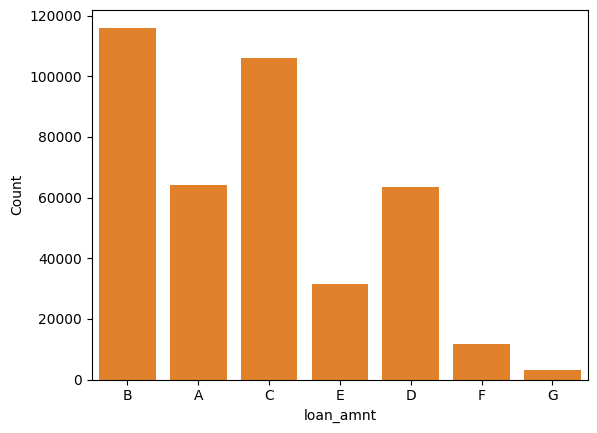

In [ ]:
sns.histplot(loan_df['loan_amnt'], bins=30)
sns.countplot(x='grade', data=loan_df)

In [ ]:
loan_df.isnull().sum().sort_values(ascending=False)


,0
mort_acc,37795
emp_title,22927
emp_length,18301
title,1756
pub_rec_bankruptcies,535
revol_util,276
installment,0
int_rate,0
term,0
grade,0


In [ ]:
loan_df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


grade & sub_grade
grade: LC assigned loan grade
sub_grade: LC assigned loan subgrade
Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans.

What are the unique possible grade & sub_grade?

In [ ]:
print(f"GRADE unique: {loan_df.grade.unique()}")
print(f"SUB_GRADE unique: {loan_df.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


In [ ]:
loan_df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,112
NONE,31
ANY,3


In [ ]:
loan_df.loc[(loan_df.home_ownership == 'ANY') | (loan_df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
loan_df.home_ownership.value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,146


In [ ]:
loan_df.loc[loan_df['home_ownership']=='OTHER', 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,123
Charged Off,23


In [ ]:
print((loan_df[loan_df.annual_inc >= 250000].shape[0] / loan_df.shape[0]) * 100)
print((loan_df[loan_df.annual_inc >= 1000000].shape[0] / loan_df.shape[0]) * 100)

1.0294674645860162
0.018937959245511705


In [ ]:
loan_df.loc[loan_df.annual_inc >= 1000000, 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,65
Charged Off,10


In [ ]:
loan_df.loc[loan_df.annual_inc >= 250000, 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,3509
Charged Off,568


# Data PreProcessing

Goals:

*   Remove or fill any missing data.
*   Convert categorical string features to dummy variables.
*   Remove unnecessary or repetitive features.

In [ ]:
print([column for column in loan_df.columns if loan_df[column].dtype == object])

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


In [ ]:
loan_df.emp_title.nunique()

173105

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [ ]:
loan_df.drop('emp_title', axis=1, inplace=True)

In [ ]:
loan_df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

Converting term and loan_status to numerical value

In [ ]:
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)
loan_df['term'] = loan_df['term'].str.strip().str.replace(' months', '').astype(int)

In [ ]:
loan_df.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [ ]:
for year in loan_df.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{loan_df[loan_df.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('---------------------------------------------------------------------------')

10+ years years in this position:
loan_status
1    0.815814
0    0.184186
Name: proportion, dtype: float64
---------------------------------------------------------------------------
4 years years in this position:
loan_status
1    0.807615
0    0.192385
Name: proportion, dtype: float64
---------------------------------------------------------------------------
< 1 year years in this position:
loan_status
1    0.793128
0    0.206872
Name: proportion, dtype: float64
---------------------------------------------------------------------------
6 years years in this position:
loan_status
1    0.810806
0    0.189194
Name: proportion, dtype: float64
---------------------------------------------------------------------------
9 years years in this position:
loan_status
1    0.79953
0    0.20047
Name: proportion, dtype: float64
---------------------------------------------------------------------------
2 years years in this position:
loan_status
1    0.806738
0    0.193262
Name: proportion, dtyp

Loan status doesn't differ a lot across all the employment lengths.so we are going to drop the emp_length column.

In [ ]:
loan_df.drop('emp_length', axis=1, inplace=True)

In [ ]:
loan_df.title.value_counts().head()

,count
title,
Debt consolidation,152472
Credit card refinancing,51487
Home improvement,15264
Other,12930
Debt Consolidation,11608


In [ ]:
loan_df.purpose.value_counts().head()

,count
purpose,
debt_consolidation,234507
credit_card,83019
home_improvement,24030
other,21185
major_purchase,8790


The title column is simply a description of the purpose column. So we are going to drop the title column

In [ ]:
loan_df.drop('title', axis=1, inplace=True)

In [ ]:
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'])
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'])

/tmp/ipython-input-500-4058438285.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'])
/tmp/ipython-input-500-4058438285.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'])


We know that grade is just a sub feature of sub_grade, So we are goinig to drop it.

In [ ]:
loan_df.drop('grade', axis=1, inplace=True)

In [ ]:
#Checking for all other features with type object
print([column for column in loan_df.columns if loan_df[column].dtype == object])

['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'address']


In [ ]:
dummy_col =  ['sub_grade', 'verification_status', 'purpose', 'initial_list_status',
           'application_type', 'home_ownership']
loan_df = pd.get_dummies(loan_df, columns=dummy_col, drop_first=True)

In [ ]:
loan_df.address.head()

,address
0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
loan_df['zip_code'] = loan_df.address.apply(lambda x: x[-5:])
loan_df.zip_code.value_counts()

,count
zip_code,
70466,56985
30723,56546
22690,56527
48052,55917
00813,45824
29597,45471
05113,45402
11650,11226
93700,11151


In [ ]:
#Now dropping address
loan_df.drop('address', axis=1, inplace=True)

 we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature

In [ ]:
loan_df.drop('issue_d', axis=1, inplace=True)

In [ ]:
loan_df['earliest_cr_line'] = loan_df.earliest_cr_line.dt.year
loan_df.earliest_cr_line.nunique()

65

In [ ]:
numeric_cols = loan_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

<Axes: >

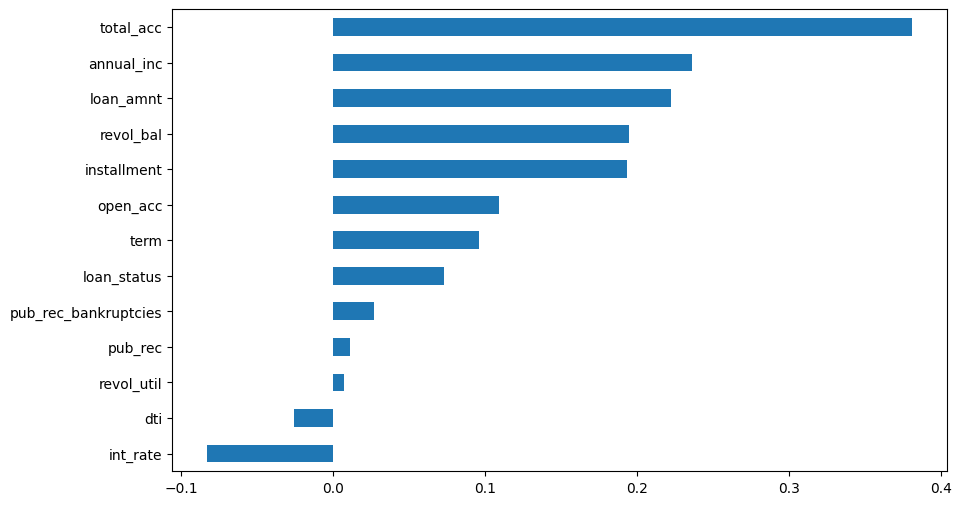

In [ ]:
loan_df[numeric_cols].corr()['mort_acc'].drop('mort_acc').sort_values().plot.barh(figsize=(10,6))

Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [ ]:
total_acc_avg = loan_df[numeric_cols].groupby(by='total_acc').mean().mort_acc

In [ ]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [ ]:
loan_df['mort_acc'] = loan_df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [ ]:
loan_df.isnull().sum().sort_values(ascending=False)

,0
pub_rec_bankruptcies,535
revol_util,276
loan_amnt,0
installment,0
annual_inc,0
...,...
application_type_JOINT,0
home_ownership_OTHER,0
home_ownership_OWN,0
home_ownership_RENT,0


In [ ]:
loan_df.shape[0]

396030

pub_rec_bankruptcies and revol_util have missing data points, but they account for less than 0.5% of the total data. So we are going to remove the rows that are missing those values in those columns with dropna().

In [ ]:
#Since only pub_rec_bankruptcies and revol_util have missing values
loan_df.dropna(inplace=True)

# Building Model

In [ ]:
numeric_cols.remove('loan_status')

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(loan_df[numeric_cols])

In [ ]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(scaled_features, columns=numeric_cols)
y = loan_df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


model = Sequential()


model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


,proportion
loan_status,
1,0.804906
0,0.195094


The data is highly imbalance so we will use class_weight='balanced' in Keras to assign higher penalty to misclassifying the minority class.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)

class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

# Use in model.fit
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=25,
                    batch_size=256,
                    class_weight=class_weights_dict)

Class Weights: {0: np.float64(2.5456104473285883), 1: np.float64(0.6222129073140397)}
Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5956 - loss: 0.6535 - val_accuracy: 0.6100 - val_loss: 0.6360
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6197 - loss: 0.6366 - val_accuracy: 0.6121 - val_loss: 0.6430
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6239 - loss: 0.6347 - val_accuracy: 0.6127 - val_loss: 0.6503
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6266 - loss: 0.6351 - val_accuracy: 0.6259 - val_loss: 0.6409
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6247 - loss: 0.6349 - val_accuracy: 0.6084 - val_loss: 0.6462
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6183 - loss: 0.6337 - val_accuracy: 0.5938 - val_loss: 0.6569
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6253 - loss: 0.6328 - val_accuracy: 0.5970 - val_loss: 0.6438
Epoc

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

preds = model.predict(X_test)
preds_binary = preds > 0.45

print(classification_report(y_test, preds_binary))
print(confusion_matrix(y_test, preds_binary))
print("ROC AUC:", roc_auc_score(y_test, preds))


2471/2471 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
              precision    recall  f1-score   support

           0       0.33      0.56      0.42     15421
           1       0.87      0.72      0.79     63623

    accuracy                           0.69     79044
   macro avg       0.60      0.64      0.60     79044
weighted avg       0.77      0.69      0.72     79044

[[ 8642  6779]
 [17526 46097]]
ROC AUC: 0.7042918233928368


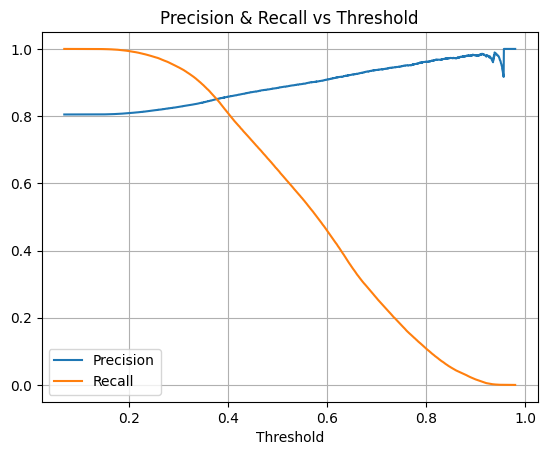

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, preds)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.grid()
plt.title('Precision & Recall vs Threshold')
plt.show()


PermutationExplainer explainer: 51it [03:05,  3.86s/it]


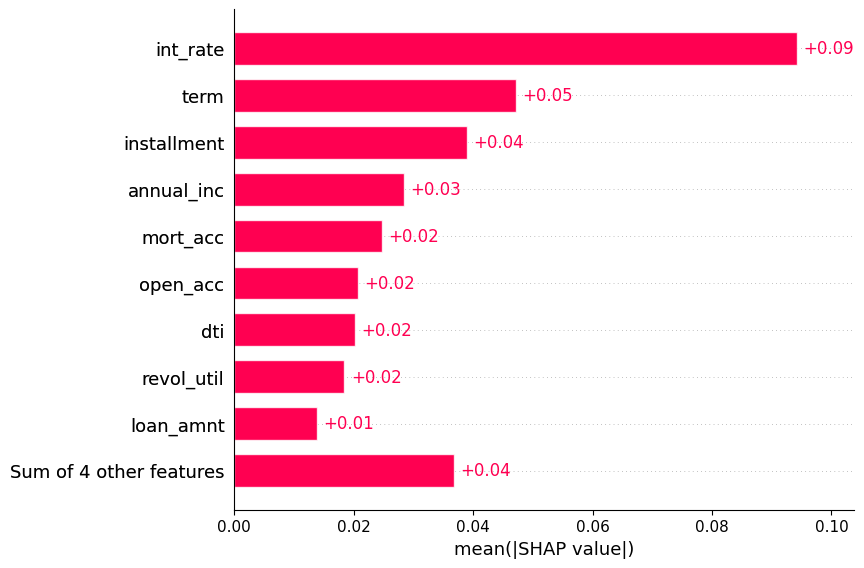

In [ ]:
# Wrap model.predict with no output
def silent_predict(X):
    return model.predict(X, verbose=0)

import shap

explainer = shap.Explainer(silent_predict, X_test[:50])
shap_values = explainer(X_test[:50])
shap.plots.bar(shap_values)

To better understand which features most influenced the model's predictions, SHAP (SHapley Additive exPlanations) was used. The SHAP bar plot shows that int_rate (interest rate) had the most significant impact on loan status prediction, followed by term, installment, and annual_inc. This suggests that loans with higher interest rates, longer durations, and higher installment amounts are more likely to be classified as defaults.



# Model Accuracy & Performance Summary
The final neural network model achieved an overall accuracy of 69% on the test set. While accuracy alone isn't sufficient for imbalanced datasets like this one, additional evaluation metrics indicate a strong and balanced performance. The model reached a precision of 87% and recall of 72% for the majority class (Fully Paid), and importantly, maintained a recall of 56% for the minority class (Charged Off). This means that over half of the truly defaulted loans were correctly identified, which is critical in minimizing financial risk.

The F1-score for the Charged Off class was 0.42, showing a good trade-off between precision and recall for detecting defaults. Additionally, the model achieved a ROC AUC score of 0.70, indicating a solid overall ability to distinguish between the two classes. These results reflect a model that can effectively support risk assessment by helping identify risky loans while still approving the majority of safe applications.